In [1]:
pip install nltk pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [10]:
# Part 1: Setup and Data Loading
import pandas as pd
import nltk

# Download required NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Load the CSV data
df = pd.read_csv("Data/exercise1.csv")

# Define emotion columns
human_cols = [
    'frustration','sadness','fear','anger','empathy','gratitude','protectiveness',
    'serenity','joy','hope','friendship','relief','compassion','self_reflection','inspiration'
]
ai_cols = [
    'ai_frustration','ai_sadness','ai_fear','ai_anger','ai_empathy','ai_gratitude',
    'ai_protectiveness','ai_serenity','ai_joy','ai_hope','ai_friendship','ai_relief',
    'ai_compassion','ai_self_reflection','ai_inspiration'
]

# Combine emotion text columns into one per source
df['human_text'] = df[human_cols].fillna('').agg(' '.join, axis=1)
df['ai_text'] = df[ai_cols].fillna('').agg(' '.join, axis=1)

print("Data loaded and emotion text columns combined.")


Data loaded and emotion text columns combined.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MSI/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


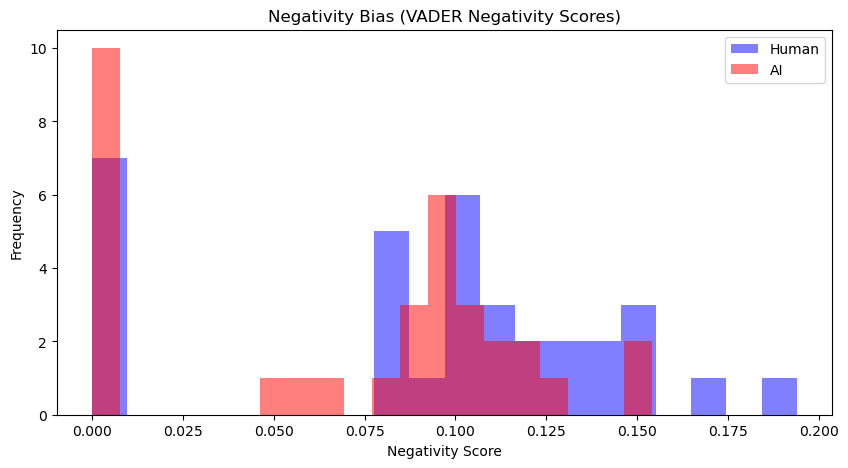

🔹 Negativity Bias Scores:
  - Avg Human Negativity Score: 0.092
  - Avg AI Negativity Score   : 0.070



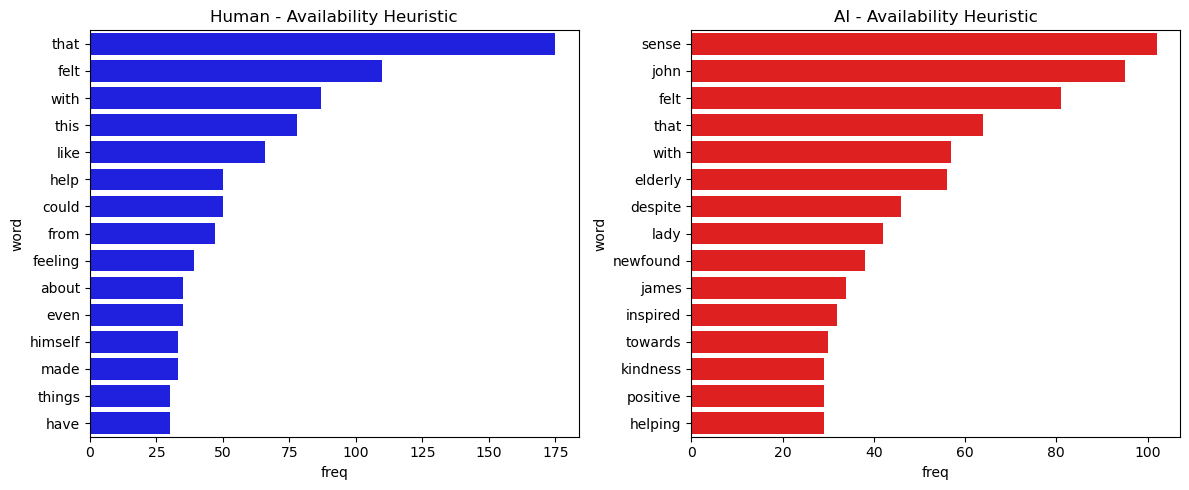

🔹 Availability Heuristic:
  - Most frequent Human word: that (175)
  - Most frequent AI word   : sense (102)



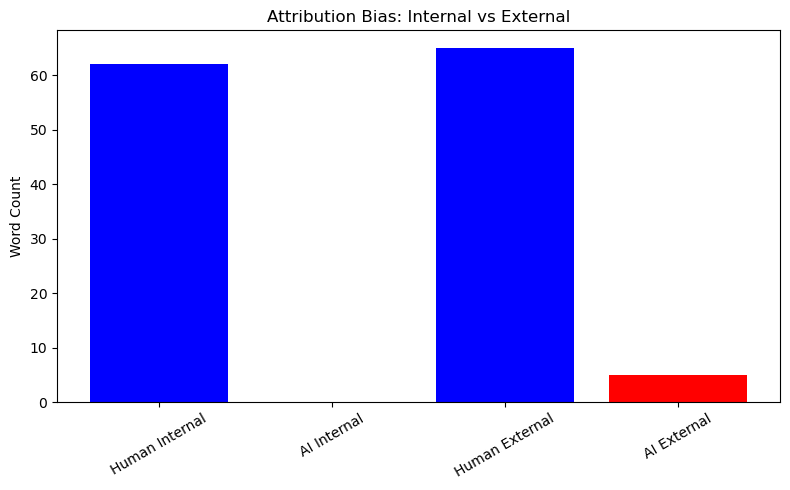

🔹 Attribution Bias:
  - Human Internal: 62
  - AI Internal   : 0
  - Human External: 65
  - AI External   : 5



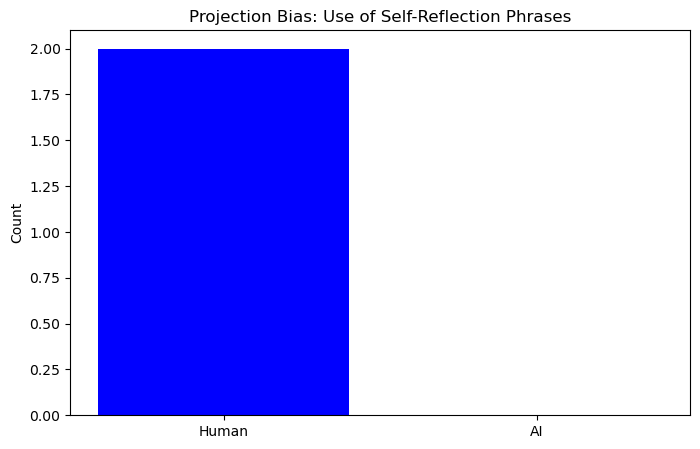

🔹 Projection Bias:
  - Human: 2
  - AI   : 0



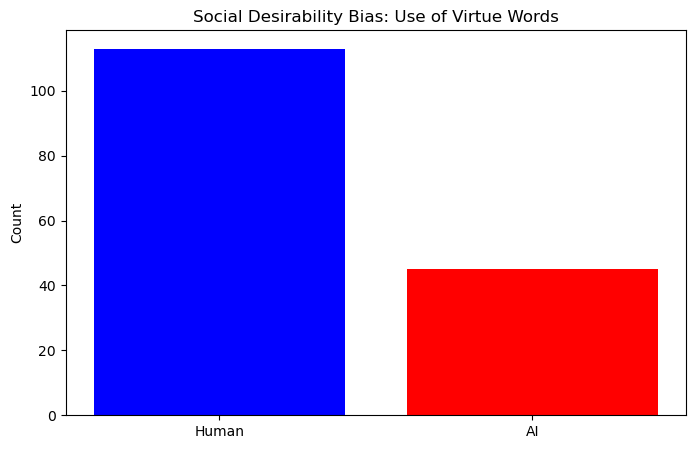

🔹 Social Desirability Bias:
  - Human: 113
  - AI   : 45



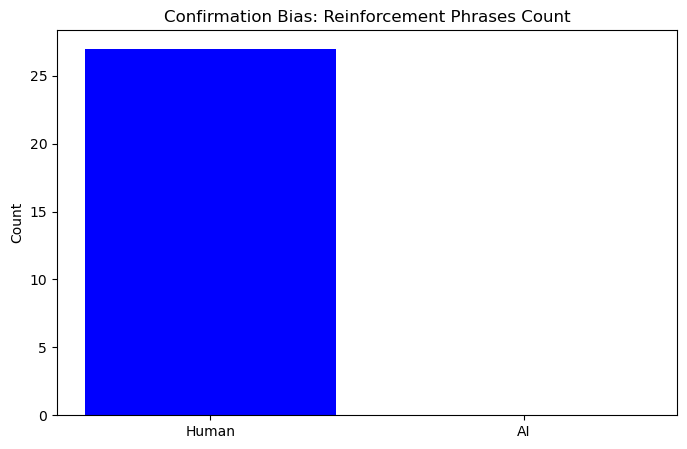

🔹 Confirmation Bias:
  - Human: 27
  - AI   : 0



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Step 1: Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Step 2: Negativity Bias (Mood-Congruent Bias)
df['human_neg'] = df['human_text'].apply(lambda x: sia.polarity_scores(x)['neg'])
df['ai_neg'] = df['ai_text'].apply(lambda x: sia.polarity_scores(x)['neg'])

plt.figure(figsize=(10, 5))
plt.hist(df['human_neg'], alpha=0.5, bins=20, label='Human', color='blue')
plt.hist(df['ai_neg'], alpha=0.5, bins=20, label='AI', color='red')
plt.title("Negativity Bias (VADER Negativity Scores)")
plt.xlabel("Negativity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("🔹 Negativity Bias Scores:")
print(f"  - Avg Human Negativity Score: {df['human_neg'].mean():.3f}")
print(f"  - Avg AI Negativity Score   : {df['ai_neg'].mean():.3f}\n")

# Step 3: Availability Heuristic
def get_frequent_words(texts, n=15):
    words = ' '.join(texts).lower().split()
    filtered = [word for word in words if word.isalpha() and len(word) > 3]
    return Counter(filtered).most_common(n)

human_words = get_frequent_words(df['human_text'])
ai_words = get_frequent_words(df['ai_text'])

human_df = pd.DataFrame(human_words, columns=['word', 'freq'])
ai_df = pd.DataFrame(ai_words, columns=['word', 'freq'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='freq', y='word', data=human_df, color='blue')
plt.title("Human - Availability Heuristic")

plt.subplot(1, 2, 2)
sns.barplot(x='freq', y='word', data=ai_df, color='red')
plt.title("AI - Availability Heuristic")
plt.tight_layout()
plt.show()

print("🔹 Availability Heuristic:")
print(f"  - Most frequent Human word: {human_df.iloc[0]['word']} ({human_df.iloc[0]['freq']})")
print(f"  - Most frequent AI word   : {ai_df.iloc[0]['word']} ({ai_df.iloc[0]['freq']})\n")

# Step 4: Attribution Bias
internal_words = ['i', 'me', 'my', 'myself']
external_words = ['they', 'them', 'their', 'because', 'blame', 'fault']

def count_attribution(text, words):
    tokens = text.lower().split()
    return sum(1 for token in tokens if token in words)

df['human_internal'] = df['human_text'].apply(lambda x: count_attribution(x, internal_words))
df['ai_internal'] = df['ai_text'].apply(lambda x: count_attribution(x, internal_words))
df['human_external'] = df['human_text'].apply(lambda x: count_attribution(x, external_words))
df['ai_external'] = df['ai_text'].apply(lambda x: count_attribution(x, external_words))

labels = ['Human Internal', 'AI Internal', 'Human External', 'AI External']
values = [
    df['human_internal'].sum(),
    df['ai_internal'].sum(),
    df['human_external'].sum(),
    df['ai_external'].sum()
]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'red', 'blue', 'red'])
plt.title("Attribution Bias: Internal vs External")
plt.ylabel("Word Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print("🔹 Attribution Bias:")
print(f"  - Human Internal: {df['human_internal'].sum()}")
print(f"  - AI Internal   : {df['ai_internal'].sum()}")
print(f"  - Human External: {df['human_external'].sum()}")
print(f"  - AI External   : {df['ai_external'].sum()}\n")

# Step 5: Projection Bias
projection_phrases = ['i feel', 'i think', 'i believe', 'i guess']

def count_projection(text):
    text = text.lower()
    return sum(text.count(phrase) for phrase in projection_phrases)

df['human_proj'] = df['human_text'].apply(count_projection)
df['ai_proj'] = df['ai_text'].apply(count_projection)

plt.figure(figsize=(8, 5))
plt.bar(['Human', 'AI'], [df['human_proj'].sum(), df['ai_proj'].sum()], color=['blue', 'red'])
plt.title("Projection Bias: Use of Self-Reflection Phrases")
plt.ylabel("Count")
plt.show()

print("🔹 Projection Bias:")
print(f"  - Human: {df['human_proj'].sum()}")
print(f"  - AI   : {df['ai_proj'].sum()}\n")

# Step 6: Social Desirability Bias
virtue_words = ['help', 'kind', 'honest', 'good', 'nice', 'positive', 'always']

def count_virtue(text):
    tokens = text.lower().split()
    return sum(1 for token in tokens if token in virtue_words)

df['human_virtue'] = df['human_text'].apply(count_virtue)
df['ai_virtue'] = df['ai_text'].apply(count_virtue)

plt.figure(figsize=(8, 5))
plt.bar(['Human', 'AI'], [df['human_virtue'].sum(), df['ai_virtue'].sum()], color=['blue', 'red'])
plt.title("Social Desirability Bias: Use of Virtue Words")
plt.ylabel("Count")
plt.show()

print("🔹 Social Desirability Bias:")
print(f"  - Human: {df['human_virtue'].sum()}")
print(f"  - AI   : {df['ai_virtue'].sum()}\n")

# Step 7: Confirmation Bias
confirmation_phrases = ['of course', 'obviously', 'clearly', 'everyone knows', 'always', 'never']

def count_confirmation(text):
    text = text.lower()
    return sum(text.count(phrase) for phrase in confirmation_phrases)

df['human_confirm'] = df['human_text'].apply(count_confirmation)
df['ai_confirm'] = df['ai_text'].apply(count_confirmation)

plt.figure(figsize=(8, 5))
plt.bar(['Human', 'AI'], [df['human_confirm'].sum(), df['ai_confirm'].sum()], color=['blue', 'red'])
plt.title("Confirmation Bias: Reinforcement Phrases Count")
plt.ylabel("Count")
plt.show()

print("🔹 Confirmation Bias:")
print(f"  - Human: {df['human_confirm'].sum()}")
print(f"  - AI   : {df['ai_confirm'].sum()}\n")


In [4]:
# Part 2: Sentiment Polarity Skew Detection
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']  # Range from -1 (negative) to +1 (positive)

# Apply to both sources
df['human_sentiment'] = df['human_text'].apply(get_sentiment)
df['ai_sentiment'] = df['ai_text'].apply(get_sentiment)

# Output average sentiment
print("Average Sentiment Scores:")
print(f"Human: {df['human_sentiment'].mean():.3f}")
print(f"AI: {df['ai_sentiment'].mean():.3f}")


Average Sentiment Scores:
Human: 0.558
AI: 0.694


In [5]:
# Part 3: Stereotyping Detection using keyword heuristics
from nltk.tokenize import word_tokenize

# Basic list of identity/stereotype-related keywords
stereotype_keywords = [
    'woman', 'man', 'girl', 'boy', 'black', 'white', 'asian', 'muslim',
    'christian', 'jewish', 'gay', 'straight', 'disabled', 'old', 'young'
]

def count_stereotypes(text):
    tokens = word_tokenize(text.lower())
    return sum(1 for token in tokens if token in stereotype_keywords)

df['human_stereotypes'] = df['human_text'].apply(count_stereotypes)
df['ai_stereotypes'] = df['ai_text'].apply(count_stereotypes)

# Output totals
print("\nStereotyping Keyword Frequency:")
print(f"Human: {df['human_stereotypes'].sum()} total mentions")
print(f"AI: {df['ai_stereotypes'].sum()} total mentions")



Stereotyping Keyword Frequency:
Human: 51 total mentions
AI: 18 total mentions


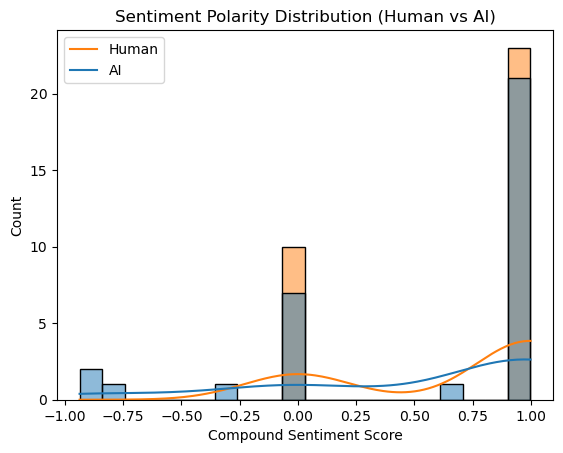

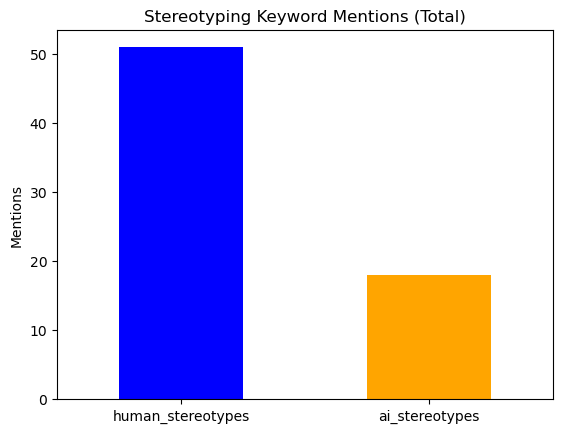

In [6]:
# Part 4: Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.histplot(df[['human_sentiment', 'ai_sentiment']], kde=True, bins=20)
plt.title("Sentiment Polarity Distribution (Human vs AI)")
plt.xlabel("Compound Sentiment Score")
plt.legend(["Human", "AI"])
plt.show()

# Plot total stereotype mentions
df[['human_stereotypes', 'ai_stereotypes']].sum().plot(kind='bar', color=['blue', 'orange'])
plt.title("Stereotyping Keyword Mentions (Total)")
plt.ylabel("Mentions")
plt.xticks(rotation=0)
plt.show()


In [13]:
import pandas as pd
from collections import Counter

# Load the CSV
df = pd.read_csv("Data/exercise1.csv")

# Combine both columns into one list of all bias statements
ai_biases = df['exp_ai_biases'].dropna().str.split(', ')
user_biases = df['exp_user_biases'].dropna().str.split(', ')

# Flatten the lists
all_ai_biases = [bias.strip() for sublist in ai_biases for bias in sublist]
all_user_biases = [bias.strip() for sublist in user_biases for bias in sublist]

# Count the frequency
ai_bias_counts = Counter(all_ai_biases)
user_bias_counts = Counter(all_user_biases)

# Combine for a total count if desired
total_bias_counts = ai_bias_counts + user_bias_counts

# Convert to DataFrame for better display
df_ai = pd.DataFrame(ai_bias_counts.items(), columns=["Bias", "AI_Count"]).sort_values(by="AI_Count", ascending=False)
df_user = pd.DataFrame(user_bias_counts.items(), columns=["Bias", "User_Count"]).sort_values(by="User_Count", ascending=False)
df_total = pd.DataFrame(total_bias_counts.items(), columns=["Bias", "Total_Count"]).sort_values(by="Total_Count", ascending=False)

# Display results
print("Most Common Biases in AI Responses:")
display(df_ai.head())

print("Most Common Biases in User Responses:")
display(df_user.head())

print("Most Common Biases Overall:")
display(df_total.head())


Most Common Biases in AI Responses:


,Bias,AI_Count
1,Can dismiss real conflicts in favor of forced ...,12
5,May idealize emotions while neglecting complex...,12
0,May cause pessimistic thinking or resistance t...,11
3,Can lead to unrealistic expectations.,11
4,Can downplay the severity of issues.,11


Most Common Biases in User Responses:


,Bias,User_Count
0,Can lead to self-victimization and emotional e...,13
15,Can be influenced by social biases or personal...,12
5,Can be selective or manipulated based on perso...,11
11,May idealize emotions while neglecting complex...,11
1,May cause pessimistic thinking or resistance t...,10


Most Common Biases Overall:


,Bias,Total_Count
5,May idealize emotions while neglecting complex...,23
9,Can lead to self-victimization and emotional e...,22
8,Can be influenced by social biases or personal...,21
0,May cause pessimistic thinking or resistance t...,21
3,Can lead to unrealistic expectations.,19


C:\Users\MSI\AppData\Local\Temp\ipykernel_54824\4240147961.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=df_ai.head(10), x="AI_Count", y="Bias", palette="Blues_d")
C:\Users\MSI\AppData\Local\Temp\ipykernel_54824\4240147961.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=df_user.head(10), x="User_Count", y="Bias", palette="Greens_d")
C:\Users\MSI\AppData\Local\Temp\ipykernel_54824\4240147961.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], data=df_total.head(10), x="Total_Count", y

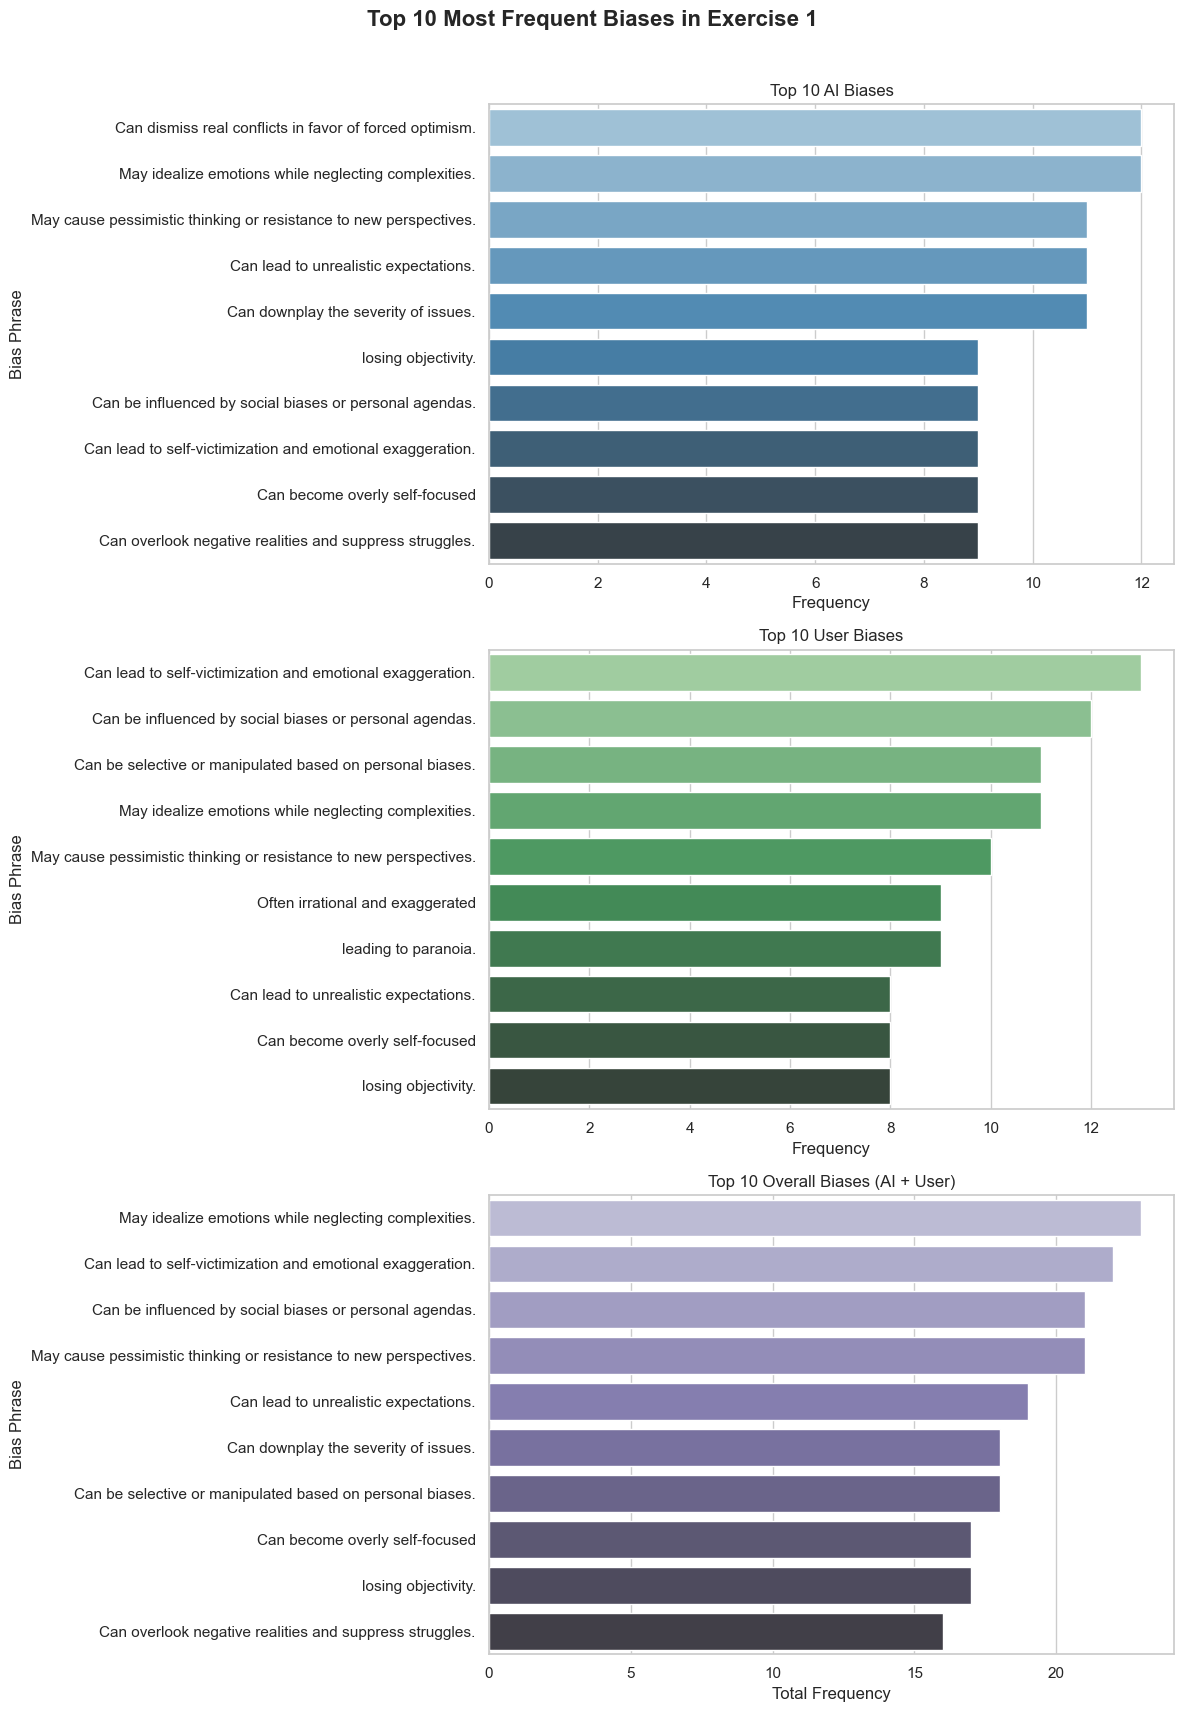

In [14]:
# Import libraries
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("Data/exercise1.csv")

# Split the comma-separated biases and flatten them into lists
ai_biases = df['exp_ai_biases'].dropna().str.split(', ')
user_biases = df['exp_user_biases'].dropna().str.split(', ')

all_ai_biases = [bias.strip() for sublist in ai_biases for bias in sublist]
all_user_biases = [bias.strip() for sublist in user_biases for bias in sublist]

# Count frequency of each bias
ai_bias_counts = Counter(all_ai_biases)
user_bias_counts = Counter(all_user_biases)
total_bias_counts = ai_bias_counts + user_bias_counts

# Convert to DataFrames
df_ai = pd.DataFrame(ai_bias_counts.items(), columns=["Bias", "AI_Count"]).sort_values(by="AI_Count", ascending=False)
df_user = pd.DataFrame(user_bias_counts.items(), columns=["Bias", "User_Count"]).sort_values(by="User_Count", ascending=False)
df_total = pd.DataFrame(total_bias_counts.items(), columns=["Bias", "Total_Count"]).sort_values(by="Total_Count", ascending=False)

# -------------------------
# Plotting Section
# -------------------------
sns.set(style="whitegrid")

# Create a 3-row plot for AI, User, and Total
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Top 10 Most Frequent Biases in Exercise 1", fontsize=16, fontweight='bold')

# Plot 1: AI Biases
sns.barplot(ax=axes[0], data=df_ai.head(10), x="AI_Count", y="Bias", palette="Blues_d")
axes[0].set_title("Top 10 AI Biases")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Bias Phrase")

# Plot 2: User Biases
sns.barplot(ax=axes[1], data=df_user.head(10), x="User_Count", y="Bias", palette="Greens_d")
axes[1].set_title("Top 10 User Biases")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Bias Phrase")

# Plot 3: Total Biases
sns.barplot(ax=axes[2], data=df_total.head(10), x="Total_Count", y="Bias", palette="Purples_d")
axes[2].set_title("Top 10 Overall Biases (AI + User)")
axes[2].set_xlabel("Total Frequency")
axes[2].set_ylabel("Bias Phrase")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


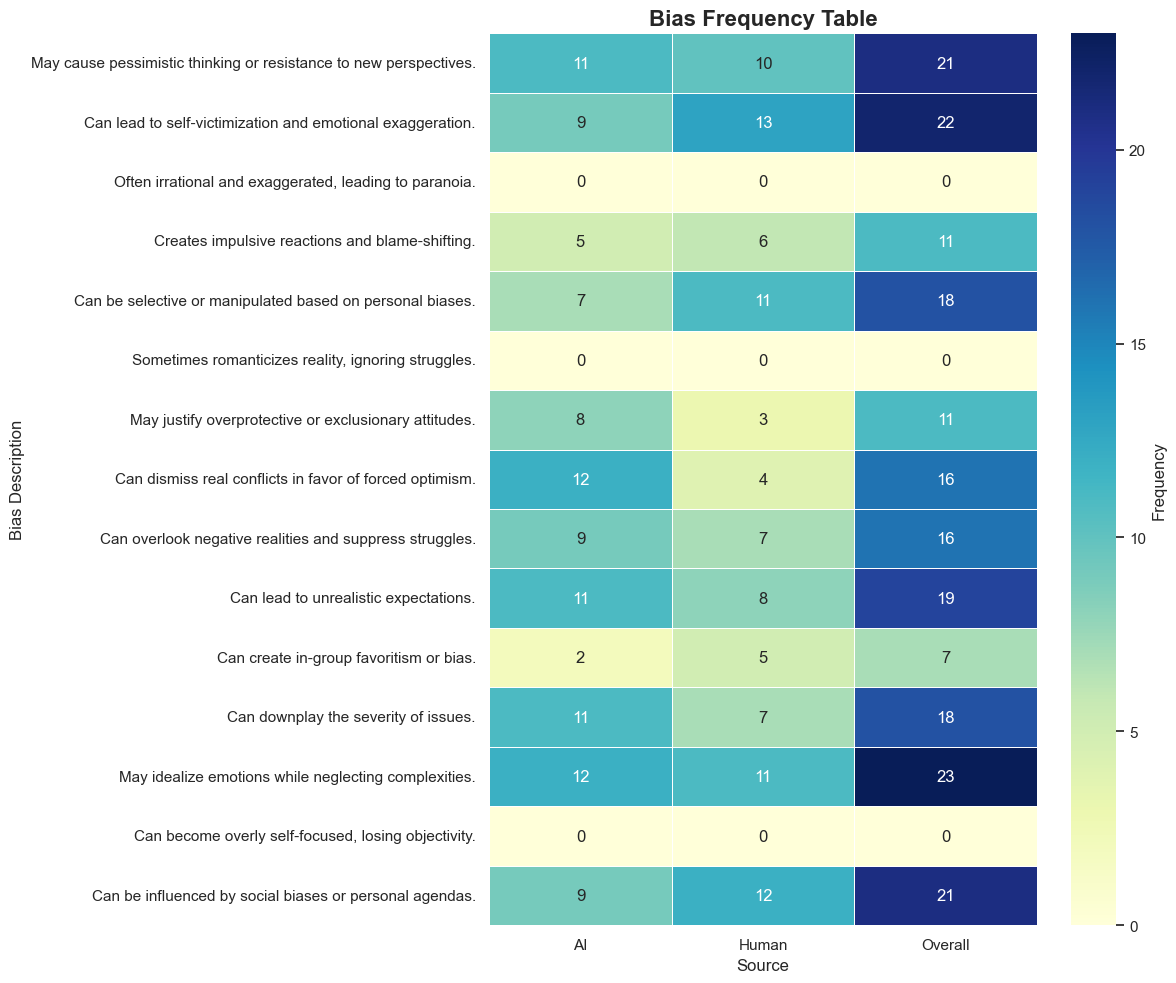

                                                 Bias  AI  Human  Overall
0   May cause pessimistic thinking or resistance t...  11     10       21
1   Can lead to self-victimization and emotional e...   9     13       22
2   Often irrational and exaggerated, leading to p...   0      0        0
3     Creates impulsive reactions and blame-shifting.   5      6       11
4   Can be selective or manipulated based on perso...   7     11       18
5   Sometimes romanticizes reality, ignoring strug...   0      0        0
6   May justify overprotective or exclusionary att...   8      3       11
7   Can dismiss real conflicts in favor of forced ...  12      4       16
8   Can overlook negative realities and suppress s...   9      7       16
9               Can lead to unrealistic expectations.  11      8       19
10            Can create in-group favoritism or bias.   2      5        7
11               Can downplay the severity of issues.  11      7       18
12  May idealize emotions while neglec

In [18]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Predefined list of all possible biases (ensures order and inclusion)
all_biases_list = [
    "May cause pessimistic thinking or resistance to new perspectives.",
    "Can lead to self-victimization and emotional exaggeration.",
    "Often irrational and exaggerated, leading to paranoia.",
    "Creates impulsive reactions and blame-shifting.",
    "Can be selective or manipulated based on personal biases.",
    "Sometimes romanticizes reality, ignoring struggles.",
    "May justify overprotective or exclusionary attitudes.",
    "Can dismiss real conflicts in favor of forced optimism.",
    "Can overlook negative realities and suppress struggles.",
    "Can lead to unrealistic expectations.",
    "Can create in-group favoritism or bias.",
    "Can downplay the severity of issues.",
    "May idealize emotions while neglecting complexities.",
    "Can become overly self-focused, losing objectivity.",
    "Can be influenced by social biases or personal agendas."
]

# Load the dataset
df = pd.read_csv("Data/exercise1.csv")

# Split and flatten biases
ai_biases = df['exp_ai_biases'].dropna().str.split(', ')
user_biases = df['exp_user_biases'].dropna().str.split(', ')

all_ai = [b.strip() for sublist in ai_biases for b in sublist]
all_user = [b.strip() for sublist in user_biases for b in sublist]

# Count frequencies
ai_counts = Counter(all_ai)
user_counts = Counter(all_user)

# Create table with counts
bias_freq_table = pd.DataFrame({
    "Bias": all_biases_list,
    "AI": [ai_counts.get(bias, 0) for bias in all_biases_list],
    "Human": [user_counts.get(bias, 0) for bias in all_biases_list]
})

# Add overall column
bias_freq_table["Overall"] = bias_freq_table["AI"] + bias_freq_table["Human"]

# Set Bias as index for plotting
bias_freq_table_plot = bias_freq_table.set_index("Bias")

# Plot as annotated heatmap-style table
plt.figure(figsize=(12, 10))
sns.heatmap(
    bias_freq_table_plot,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Frequency'}
)

plt.title("Bias Frequency Table", fontsize=16, fontweight='bold')
plt.ylabel("Bias Description")
plt.xlabel("Source")
plt.tight_layout()
plt.show()

print(bias_freq_table)
